In [1]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
csv_dict = dict()

## extract .csv data

In [3]:
csv_directory = "./measurements/concurrent-hashmap-to-hashmap-entryset"
plot_directory = csv_directory + "/plots"
Path(plot_directory).mkdir(parents=True, exist_ok=True)
for file in os.listdir(csv_directory):
    if file.endswith(".csv"):
        cur_csv = pd.read_csv(os.path.join(csv_directory, file))
        csv_dict[file] = cur_csv

In [4]:
def save_plot(plotname):
    plt.savefig(plot_directory + "/" + plotname + ".jpg")

## sort .csv data by amount of scanned files (ascending)

In [5]:
sorted_file_names = sorted(csv_dict.keys(), key= lambda x : int(x.split("-")[2].split(".")[0]))

## plot each data individually

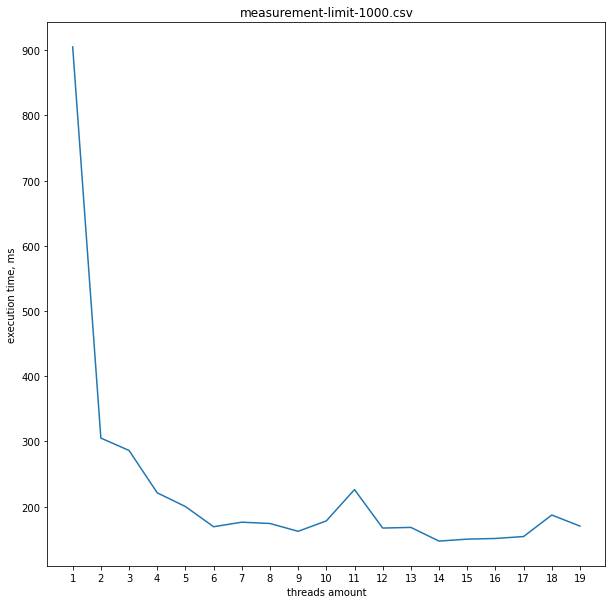

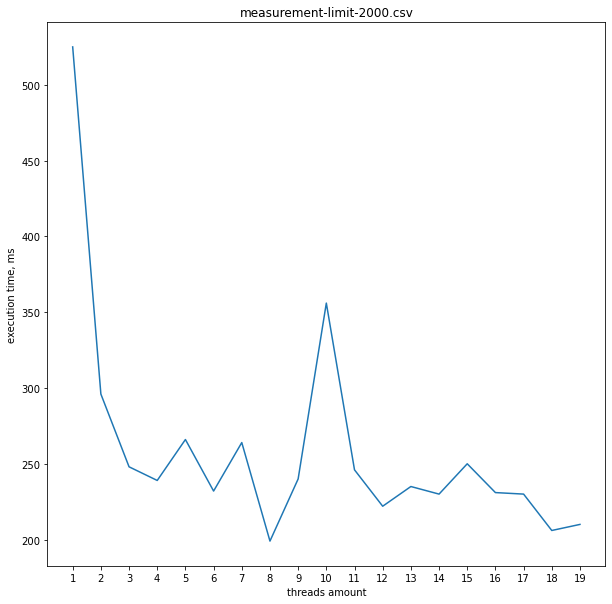

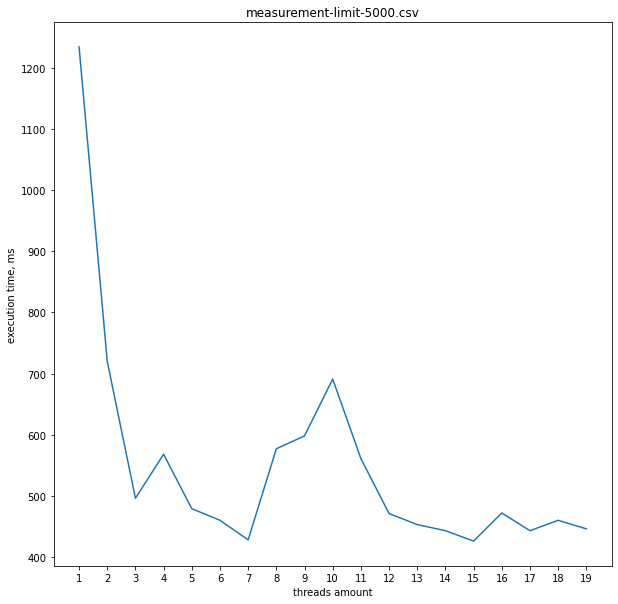

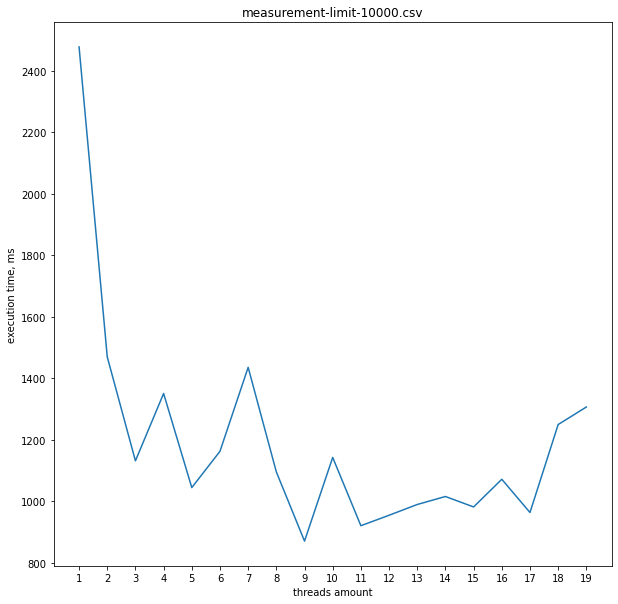

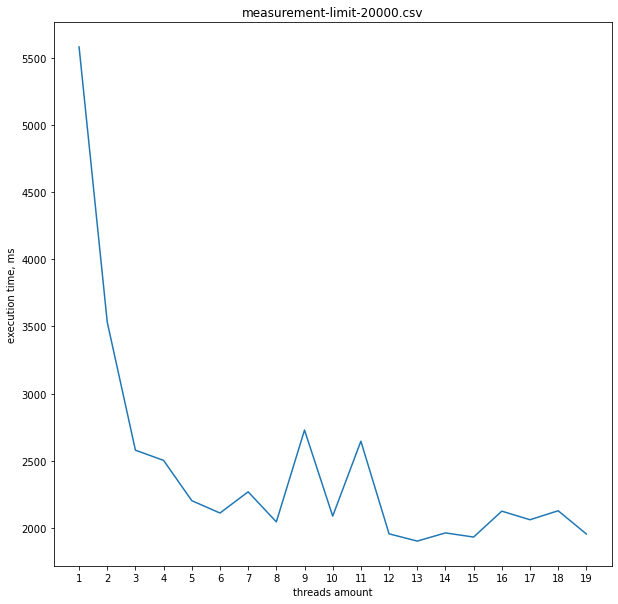

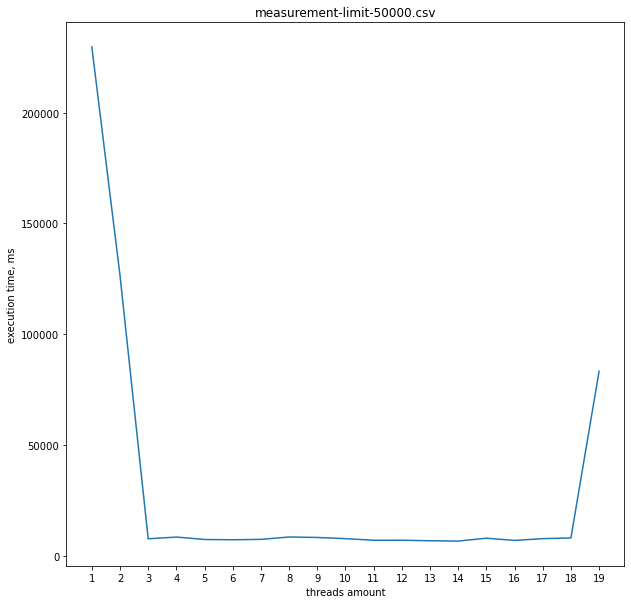

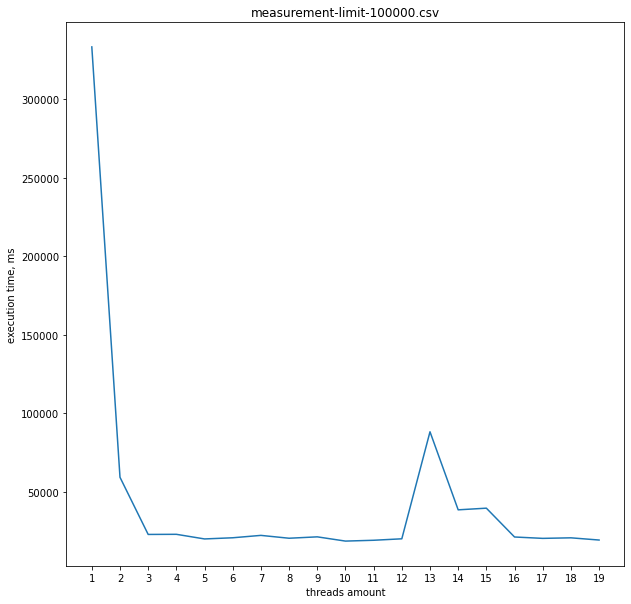

In [6]:
plt.rcParams["figure.figsize"] = (10,10)
for name in sorted_file_names:
    plt.figure()
    df = csv_dict[name]
    x = df["threads"]
    y = df["exec_time"]
    plt.title(name)
    plt.xlabel("threads amount")
    plt.ylabel("execution time, ms")
    plt.xticks(x)
    plt.plot(x,y)
    save_plot(name)


## plot all the data

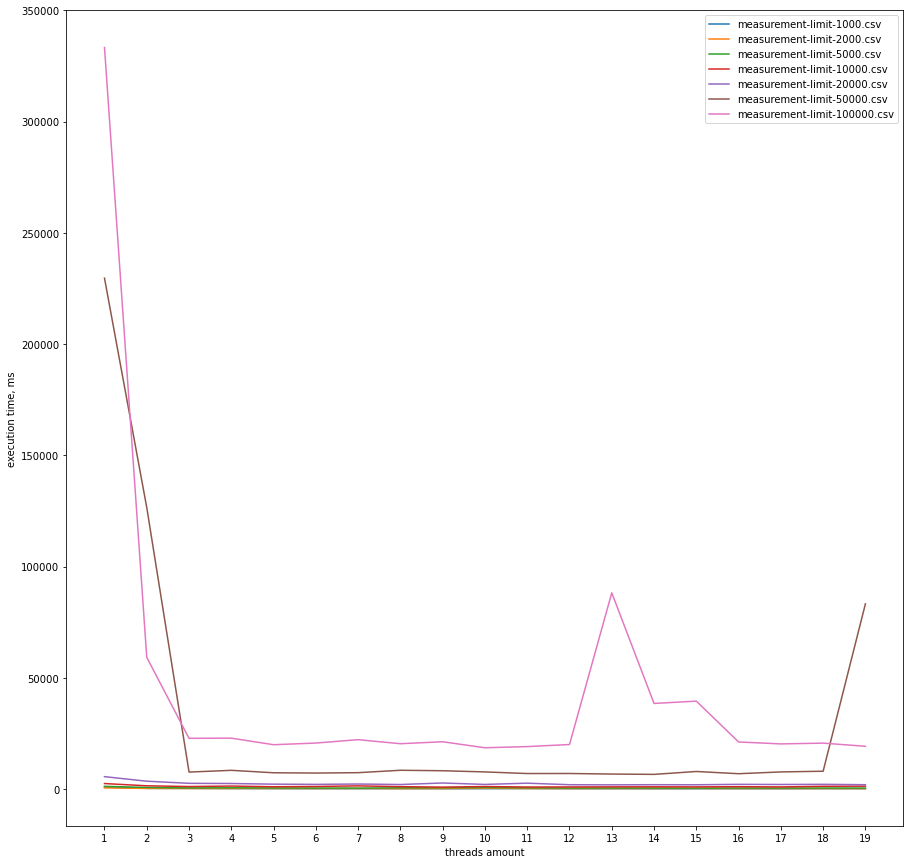

In [7]:
plt.rcParams["figure.figsize"] = (15,15)
for name in sorted_file_names:
    df = csv_dict[name]
    x = df["threads"].tolist()
    y = df["exec_time"]
    plt.plot(x,y, label=name)
    plt.xticks(x)
plt.xlabel("threads amount")
plt.ylabel("execution time, ms")
plt.legend()
save_plot("total")
plt.show()

## close-up plot

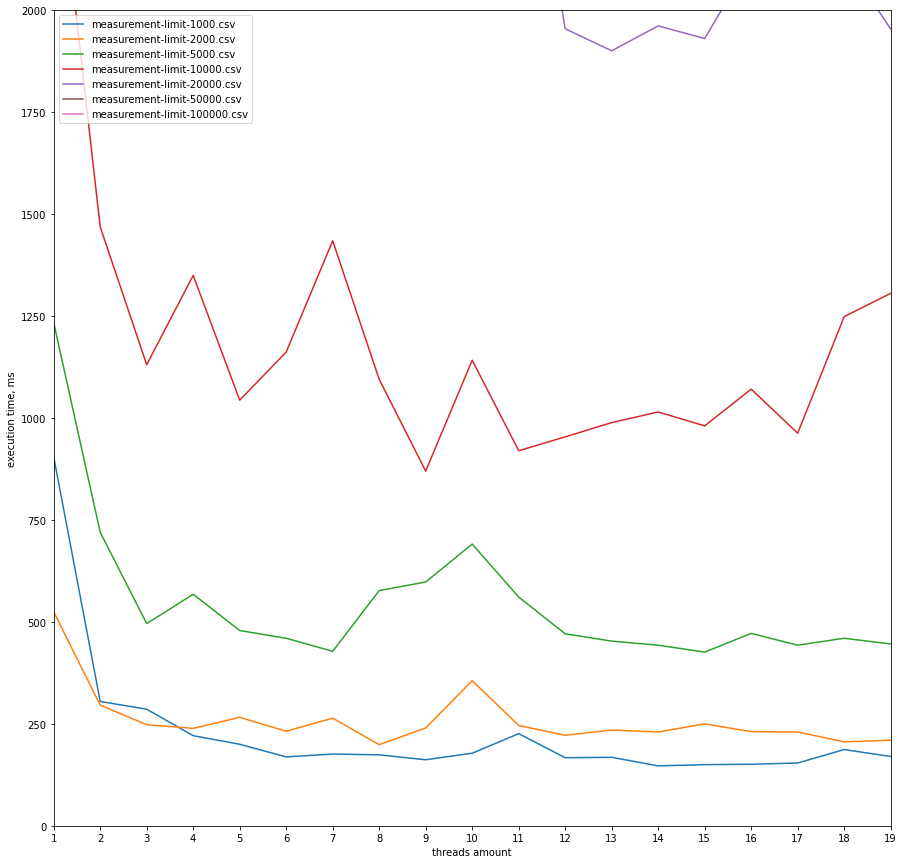

In [8]:
plt.rcParams["figure.figsize"] = (15,15)
for name in sorted_file_names:
    df = csv_dict[name]
    x = df["threads"].tolist()
    y = df["exec_time"]
    plt.plot(x,y, label=name)
    plt.xticks(x)
plt.xlabel("threads amount")
plt.ylabel("execution time, ms")
plt.axis([1,19,0,2000])
plt.legend()
save_plot("close-up")
plt.show()